# Exploring the penguin data

This notebook will use the **Palmer Archipelago (Antarctica) penguin data** which is seen as a replacement for the Iris dataset.

The original penguin data is available from Parul Pandey's kaggle page: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data (Pandey 2020) and is also described at: https://github.com/allisonhorst/palmerpenguins/blob/main/README.md (Horst 2022), though the exploration there is in R. 

This notebook will use the original data files found at Kaggle, rather than the amended dataset described on Allison's page.

The data represent measurements taken from three different species of penguin, Chinstrap, Gentoo and Adélie. The original research was looking at sexual dimorphism and environmental variability in these three penguin species.

![Penguins “Artwork by @allison_horst”.](images/lter_penguins.png)


## Acknowledgements 

This notebook is based on the ones produced by Colin Blackburn, OU Tutor. 
- 31 Mar 2021, 07:44


This notebook has been updated by Mary Garvey

- 21 April 2023

All artwork by @allison_horst

## Palmer Archipelago (Antarctica) penguin data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The following information has been taken from Pandey 2020:

License & citation

    Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

    Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

#### Summary:

The data folder contains two CSV files:

    penguins_size.csv: 
        Simplified data from original penguin data sets. Contains variables:
            species: penguin species (Chinstrap, Adélie, or Gentoo)
            culmen_length_mm: culmen length (mm)
            culmen_depth_mm: culmen depth (mm)
            flipper_length_mm: flipper length (mm)
            body_mass_g: body mass (g)
            island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
            sex: penguin sex

    penguins_lter.csv: 
        Original combined data for 3 penguin species (aggregated from the original data - see "Links to original data & metadata" on Kaggle page)
    
    
This notebook will use the penguins_size.csv dataset.

## Explore and import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns

Do some checks on the data files.

In [2]:
!ls data

adelie.csv     gender_submission.csv  penguins.csv	 test.csv
chinstrap.csv  gentoo.csv	      penguins_lter.csv  train.csv
females.csv    males.csv	      penguins_size.csv  unknowns.csv


In [3]:
chardet.detect(open('data/penguins_size.csv', 'rb').read())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
chardet.detect(open('data/penguins_lter.csv', 'rb').read())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [5]:
penguins_df = pd.read_csv('data/penguins_size.csv')
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


According to the data citations the file contains data about three penguin species. Best to check:

In [6]:
penguins_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
# have all rows a value
penguins_df.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  334
dtype: int64

Not all columns have the same count and we can see above record 3 contains NaNs. Something to investigate as we look at the three types of penguins.

For this exploration we will look at species, culmen length, culmen depth, flipper length, body mass and sex. We will put each species in its own dataframe and will extract those columns, rename some columns see the image below) and change the species name to a single word for each dataframe.

![Penguins “Artwork by @allison_horst”.](images/culmen_depth.png)

In [8]:
# put them into three separate dataframes

adelie_df = penguins_df[penguins_df["species"]== 'Adelie']
chinstrap_df = penguins_df[penguins_df["species"]== 'Chinstrap']
gentoo_df = penguins_df[penguins_df["species"]== 'Gentoo']

adelie_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Reshape the dataframes to pick out the required data and make the column names more meaningful.

In [9]:
adelie_df = adelie_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
adelie_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
adelie_df.replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
adelie_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE


It look like not all rows are complete, how many are there?

In [10]:
adelie_df[adelie_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
3,Adelie,NaN,NaN,NaN,NaN,NaN
8,Adelie,34.1,18.1,193.0,3475.0,NaN
9,Adelie,42.0,20.2,190.0,4250.0,NaN
10,Adelie,37.8,17.1,186.0,3300.0,NaN
11,Adelie,37.8,17.3,180.0,3700.0,NaN
47,Adelie,37.5,18.9,179.0,2975.0,NaN


Where the sex is not given let's set it to UNKNOWN and then drop the row that has no usable data

In [11]:
adelie_df['Sex'] = adelie_df['Sex'].fillna('UNKNOWN')
adelie_df[adelie_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
3,Adelie,NaN,NaN,NaN,NaN,UNKNOWN


In [12]:
adelie_df.dropna(inplace=True)
adelie_df.head(10)

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,39.3,20.6,190.0,3650.0,MALE
6,Adelie,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,39.2,19.6,195.0,4675.0,MALE
8,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
9,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
10,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN


Check that the Sex column is as we expect.

In [13]:
adelie_df['Sex'].unique()

array(['MALE', 'FEMALE', 'UNKNOWN'], dtype=object)

Now do all of those steps for the Gentoo dataframe.

In [14]:
gentoo_df = gentoo_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
gentoo_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
gentoo_df.replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [15]:
gentoo_df[gentoo_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
246,Gentoo,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,NaN,NaN,NaN,NaN,NaN


In [16]:
gentoo_df['Sex'] = gentoo_df['Sex'].fillna('UNKNOWN')
gentoo_df[gentoo_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
339,Gentoo,NaN,NaN,NaN,NaN,UNKNOWN


In [17]:
gentoo_df.dropna(inplace=True)
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [18]:
gentoo_df['Sex'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', '.'], dtype=object)

In this case we have rows with the Sex set to '.', how many?

In [19]:
gentoo_df[gentoo_df['Sex'] == '.']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
336,Gentoo,44.5,15.7,217.0,4875.0,.


Set it to UNKNOWN

In [20]:
gentoo_df.at[336, 'Sex'] = 'UNKNOWN'
gentoo_df['Sex'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

In [21]:
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [22]:
gentoo_df = gentoo_df.reset_index(drop=True)

And again for the Chinstrap.

In [23]:
chinstrap_df = chinstrap_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
chinstrap_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
chinstrap_df.replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
chinstrap_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
152,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,52.7,19.8,197.0,3725.0,MALE


In [24]:
chinstrap_df[chinstrap_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex


In [25]:
chinstrap_df['Sex'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [26]:
chinstrap_df = chinstrap_df.reset_index(drop=True)
chinstrap_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE
1,Chinstrap,50.0,19.5,196.0,3900.0,MALE
2,Chinstrap,51.3,19.2,193.0,3650.0,MALE
3,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE
4,Chinstrap,52.7,19.8,197.0,3725.0,MALE


This dataset is complete!

### A quick look at the differences across the three species

In [27]:
adelie_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [28]:
gentoo_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [29]:
chinstrap_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


### Plot the features by sex for each species

We can produce a histogram for a given species and feature to visualise the diffences we can see above in the data. Here is one for the bill depth of Gentoo penguins.

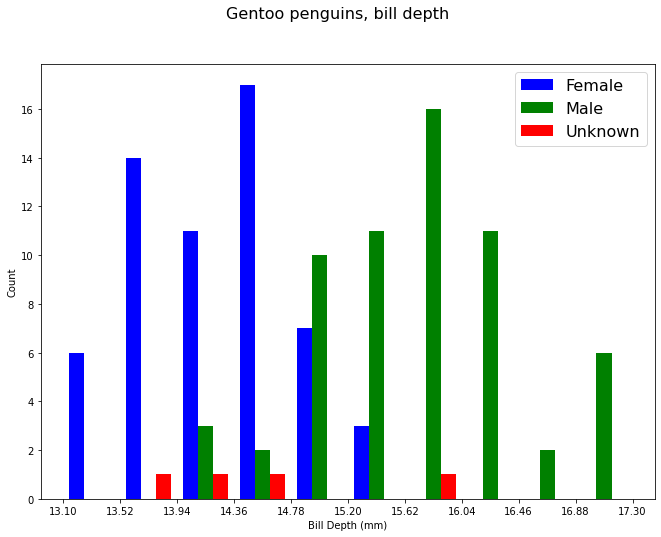

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
fig.suptitle('Gentoo penguins, bill depth', fontsize=16)

colors = ['blue', 'green', 'red']
labels = ['Female', 'Male', 'Unknown']
data = [gentoo_df[gentoo_df['Sex']=='FEMALE']['Bill Depth'],
        gentoo_df[gentoo_df['Sex']=='MALE']['Bill Depth'],
        gentoo_df[gentoo_df['Sex']=='UNKNOWN']['Bill Depth']]
n, bins, patches = ax.hist(data, histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 16})
ax.set_xlabel('Bill Depth (mm)')
ax.set_ylabel('Count')
ax.set_xticks(bins)

plt.show()

From a first look the bill depth seems smaller for the female Gentoo penguins. 

Things to think about, will the other penguins and features have a similar pattern? Looking for the patterns can help determine what the unknowns are.

It would be tedious to produce a chart for each feature of each species, instead we can create a function to produce a combined figure for each species. This uses and inner function to produce each subplot.

This compromises a bit on readability but is okay for this investigative visualisation.

In [31]:
def species_histograms(df):
    # Use an inner function for each separate plot
    def subplot(ax, df, column, column_label):
        colors = ['blue', 'green', 'red']
        labels = ['Female', 'Male', 'Unknown']
        data = [df[df['Sex']=='FEMALE'][column],
                df[df['Sex']=='MALE'][column],
                df[df['Sex']=='UNKNOWN'][column]]
        n, bins, patches = ax.hist(data, histtype='bar', color=colors, label=labels)
        ax.legend(prop={'size': 8})
        ax.set_xlabel(column_label)
        ax.set_ylabel('Count')
        ax.set_xticks(bins)
        # This rounding means the labels are approximate
        tick_labels = [str(round(x, 1)) for x in bins]
        ax.set_xticklabels(tick_labels, fontdict={'fontsize': 7})

    fig, axs = plt.subplots(2, 2)

    subplot(axs[0, 0], df, 'Bill Length', 'Bill Length (mm)')
    subplot(axs[0, 1], df, 'Bill Depth', 'Bill Depth (mm)')
    subplot(axs[1, 0], df, 'Flipper Length', 'Flipper Length (mm)')
    subplot(axs[1, 1], df, 'Body Mass', 'Body Mass (g)')

    fig.set_size_inches(11, 8)
    fig.suptitle('Features of '+df.at[0, 'Species']+' penguins by sex', fontsize=16)
    fig.tight_layout(pad=3.0)

    plt.show()

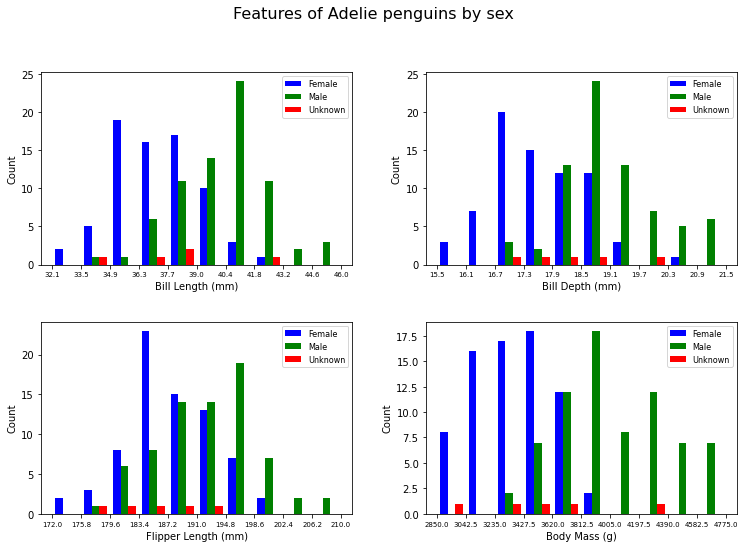

In [32]:
species_histograms(adelie_df)

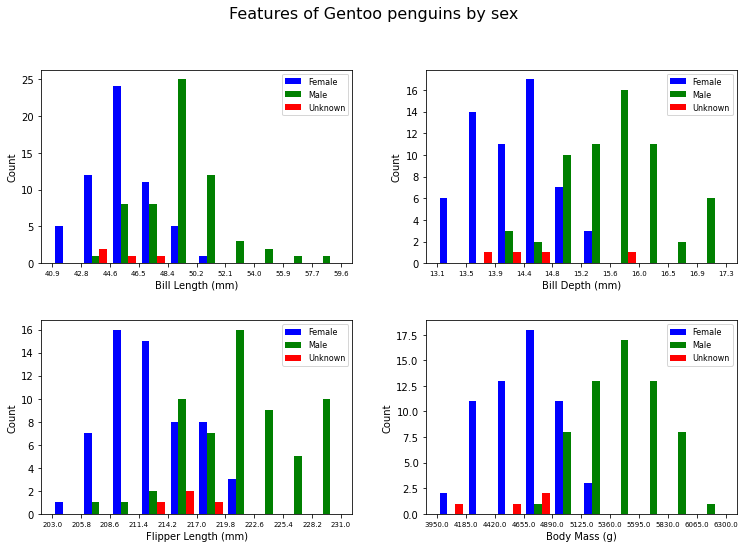

In [33]:
species_histograms(gentoo_df)

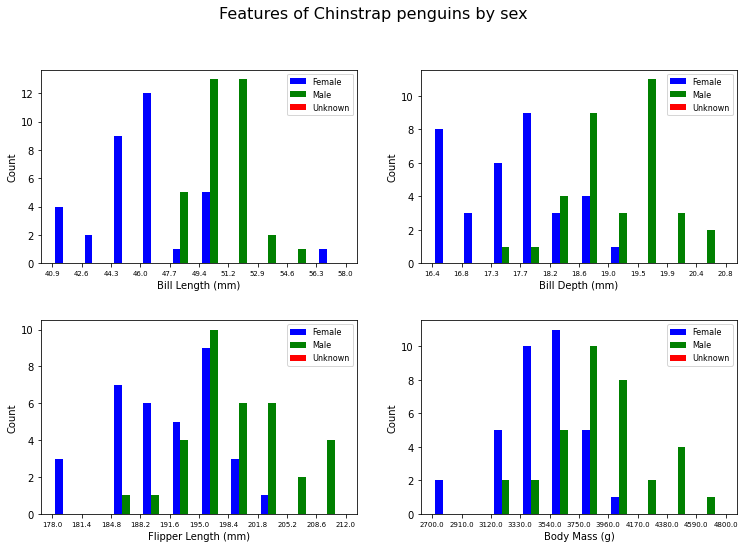

In [34]:
species_histograms(chinstrap_df)

There are clearly differences between the two sexes for all of the features. In general the males are larger than the females for each measurement. This could let us try to determine the sex of the penguins recorded as being unknown. 

The one odd value is a single record of a female Chinstrap penguin which has a bill length larger than that of any male and an outlier on the other female data. Since there is not a similar anomalous value for each of the other features it seems unlikely that the sex has been mis-recorded. In this case either the measurement was made or recorded incorrectly or there was a female chinstrap penguin with a very long bill! It would be worth looking at the original paper to see if this is remarked upon.

#### Save the cleaned and reduced data by species

In [35]:
adelie_df.to_csv('data/adelie.csv', index=False)
gentoo_df.to_csv('data/gentoo.csv', index=False)
chinstrap_df.to_csv('data/chinstrap.csv', index=False)

### Combine the data and then compare features by sex for each species.

In [36]:
penguins_df = adelie_df.copy()
penguins_df = penguins_df.append(gentoo_df, ignore_index=True)
penguins_df.tail()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
269,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
270,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
271,Gentoo,50.4,15.7,222.0,5750.0,MALE
272,Gentoo,45.2,14.8,212.0,5200.0,FEMALE
273,Gentoo,49.9,16.1,213.0,5400.0,MALE


In [37]:
penguins_df = penguins_df.append(chinstrap_df, ignore_index=True)
penguins_df.tail()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
337,Chinstrap,55.8,19.8,207.0,4000.0,MALE
338,Chinstrap,43.5,18.1,202.0,3400.0,FEMALE
339,Chinstrap,49.6,18.2,193.0,3775.0,MALE
340,Chinstrap,50.8,19.0,210.0,4100.0,MALE
341,Chinstrap,50.2,18.7,198.0,3775.0,FEMALE


In [38]:
males_df = penguins_df[penguins_df['Sex']=='MALE'].copy().reset_index(drop=True)
males_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.3,20.6,190.0,3650.0,MALE
2,Adelie,39.2,19.6,195.0,4675.0,MALE
3,Adelie,38.6,21.2,191.0,3800.0,MALE
4,Adelie,34.6,21.1,198.0,4400.0,MALE


In [39]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)
females_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE


In [40]:
unknowns_df = penguins_df[penguins_df['Sex']=='UNKNOWN'].copy().reset_index(drop=True)
unknowns_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
1,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
2,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN
3,Adelie,37.8,17.3,180.0,3700.0,UNKNOWN
4,Adelie,37.5,18.9,179.0,2975.0,UNKNOWN


#### Save the cleaned and reduced data as a single file and by sex 

In [41]:
penguins_df.to_csv('data/penguins.csv', index=False)
males_df.to_csv('data/males.csv', index=False)
females_df.to_csv('data/females.csv', index=False)
unknowns_df.to_csv('data/unknowns.csv', index=False)

### Which chart?

Deciding which type of chart is important to visualise the data. The above histograms were appropriate for showing the distribution of data for the different features of the penguins.

What if we wanted to compare two features, such as the Bill Length and Bill Depth for all three species, what sort of chart is appropriate? Bar and scatter plots are two commonly used charts, let's see what they look like.

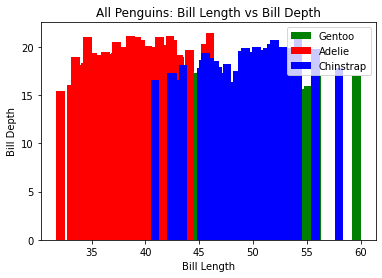

In [42]:
# Plot the data points which correspond to each penguin for two features using a bar chart
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.bar(
        penguins_df[penguins_df['Species']==species]['Bill Length'],
        penguins_df[penguins_df['Species']==species]['Bill Depth'],
        color=colors[species], label=species)
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('All Penguins: Bill Length vs Bill Depth')
plt.legend()
plt.plot()
pass

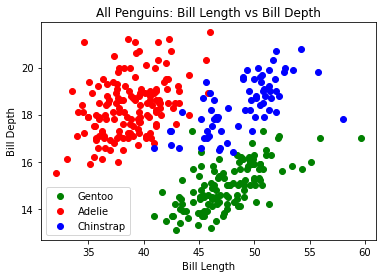

In [43]:
# Same again, but this time using a scatter plot
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.scatter(
        penguins_df[penguins_df['Species']==species]['Bill Length'],
        penguins_df[penguins_df['Species']==species]['Bill Depth'],
        color=colors[species], label=species)
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('All Penguins: Bill Length vs Bill Depth')
plt.legend()
plt.plot()
pass

Which plot was better for this?

The three species clearly have some differences using these two features but there is some overlap. We've already seen that the range of the measurements of each feature varies by sex so further investigations could compare the features for each sex separately.

There is not one plot that will suit all data, you will often have to experiment. If the chart does not appear to be showing the data well, or comes across as being very simple, then do investigate alternatives.

Scatter plots are not always the answer when comparing two values. Let's look at the other file: penguins_lter. It contains data about the islands they live on and the "Date Egg", which according to the metadata of the original dataset: https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-pal.221.6
is: "*Date study nest observed with 1 egg (sampled)*".

If you have watched any of David Attenborough's Frozen series, penguins generally only have one egg per nest.

In [44]:
penguinsLt_df = pd.read_csv('data/penguins_lter.csv')
penguinsLt_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [45]:
#update to shorter Species names
penguinsLt_df.replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
penguinsLt_df.replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
penguinsLt_df.replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
penguinsLt_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [46]:
# Check if any other values and what Islands there are
print(penguinsLt_df['Species'].unique())
print(penguinsLt_df['Island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


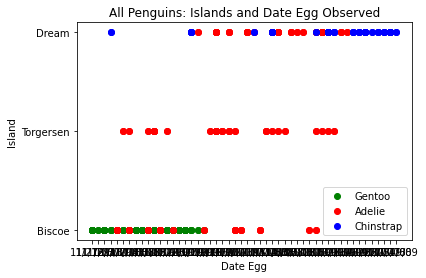

In [47]:
# I'm interested in what islands the penguins live on and the dates observed:
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.scatter(
        penguinsLt_df[penguinsLt_df['Species']==species]['Date Egg'],
        penguinsLt_df[penguinsLt_df['Species']==species]['Island'],
        color=colors[species], label=species)

    plt.xlabel('Date Egg')
plt.ylabel('Island')
plt.title('All Penguins: Islands and Date Egg Observed')
plt.legend()
plt.plot()
pass

Hmmm, not the best use of a scatter plot! Perhaps the date is not a good value for a scatter plot. Let's look at what values there are:

In [48]:
print(penguinsLt_df['Date Egg'].unique())

['11/11/07' '11/16/07' '11/15/07' '11/9/07' '11/12/07' '11/10/07'
 '11/13/07' '11/19/07' '11/6/08' '11/9/08' '11/15/08' '11/13/08'
 '11/11/08' '11/14/08' '11/8/08' '11/2/08' '11/7/08' '11/17/08' '11/5/08'
 '11/10/08' '11/9/09' '11/15/09' '11/20/09' '11/12/09' '11/17/09'
 '11/18/09' '11/22/09' '11/16/09' '11/21/09' '11/23/09' '11/10/09'
 '11/13/09' '11/14/09' '11/26/07' '11/21/07' '11/28/07' '11/22/07'
 '11/30/07' '12/3/07' '11/25/08' '11/24/08' '11/27/09' '11/19/09'
 '11/27/07' '11/18/07' '11/29/07' '11/4/08' '11/3/08' '11/25/09' '12/1/09']


Some aggregation might be better here, first make sure we are working with a date time.

In [49]:
penguinsLt_df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [50]:
# Date Egg is an object, so let's include a column converted to a date time
penguinsLt_df['EggDate'] = pd.to_datetime(penguinsLt_df['Date Egg'], format = '%y/%d/%m')

In [51]:
# check for any missing dates
penguinsLt_df.count()

studyName              344
Sample Number          344
Species                344
Region                 344
Island                 344
Stage                  344
Individual ID          344
Clutch Completion      344
Date Egg               344
Culmen Length (mm)     342
Culmen Depth (mm)      342
Flipper Length (mm)    342
Body Mass (g)          342
Sex                    334
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                26
EggDate                344
dtype: int64

Some columns have missing values, but our date columns look complete.

Aggregate the data: count penguins by island and species:

In [52]:
results_df = penguinsLt_df.groupby(['Island','Species','EggDate']).count()      

In [53]:
results_df=results_df.reset_index()
results_df.head()

,Island,Species,EggDate,studyName,Sample Number,Region,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Biscoe,Adelie,2011-07-10,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
1,Biscoe,Adelie,2011-07-12,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
2,Biscoe,Adelie,2011-08-06,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
3,Biscoe,Adelie,2011-08-09,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
4,Biscoe,Adelie,2011-08-13,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0


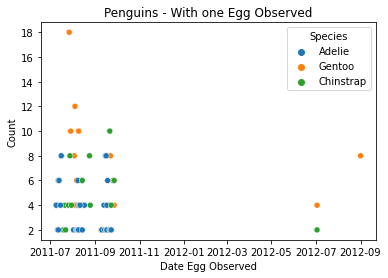

In [54]:
sns.scatterplot(data=results_df, x='EggDate', y='studyName',
            hue='Species')

plt.title('Penguins - With one Egg Observed')
plt.xlabel('Date Egg Observed')
plt.ylabel('Count')
plt.show()

Still not very helpful and I have found an issue with the dates - the day gets truncated, so we only see values for the year/month. 

Some investigation implies I could have an older version of Matplotlib - one for further work later....

For now generate the statistics per month/year:

In [55]:
# remove the day from the date, so just have year/month
penguinsLt_df['YearMonth'] = penguinsLt_df['EggDate'].apply(lambda x:x.strftime('%Y/%m'))

In [56]:
# count the penguins by island, species and year/month
results_df = penguinsLt_df.groupby(['Island','Species','YearMonth']).count() 
results_df = results_df.reset_index()
results_df.head()

,Island,Species,YearMonth,studyName,Sample Number,Region,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,EggDate
0,Biscoe,Adelie,2011/07,10,10,10,10,10,10,10,10,10,10,10,10,10,10,2,10
1,Biscoe,Adelie,2011/08,18,18,18,18,18,18,18,18,18,18,18,18,18,18,0,18
2,Biscoe,Adelie,2011/09,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,16
3,Biscoe,Gentoo,2011/07,30,30,30,30,30,30,30,30,30,30,30,29,29,29,0,30
4,Biscoe,Gentoo,2011/08,46,46,46,46,46,46,46,46,46,46,46,45,46,46,0,46


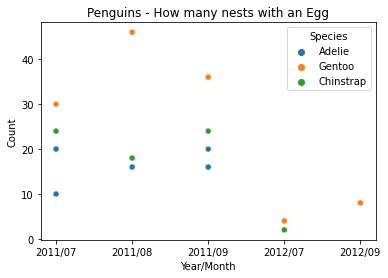

In [57]:
# show the results by penguin type
sns.scatterplot(data=results_df, x='YearMonth', y='Sample Number',
            hue='Species')

plt.title('Penguins - How many nests with an Egg')
plt.xlabel('Year/Month')
plt.ylabel('Count')
plt.show()

In [58]:
# a lot less dates - check how many
results_df['YearMonth'].unique()

array(['2011/07', '2011/08', '2011/09', '2012/07', '2012/09'],
      dtype=object)

A scatter plot is not very meaningful here, perhaps a bar chart would be better for this data.

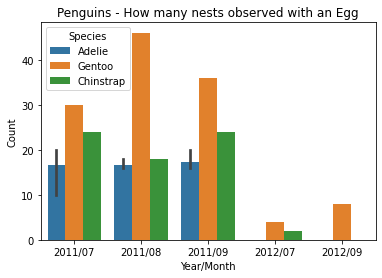

In [59]:
sns.barplot(data=results_df, x='YearMonth', y='Sample Number',
            hue='Species')

plt.title('Penguins - How many nests observed with an Egg')
plt.xlabel('Year/Month')
plt.ylabel('Count')
plt.show()

There was a big drop in numbers for 2012, with nothing at all for the Adelie penguins. Was this due to less observations that year, or did something drastic happen to the penguins? Some investigation into the research would be needed to find out if there was any issues.

**Future work:**

- this could be an area for further investigation. There is a *Clutch_Completion* column so could investigate whether all eggs hatched.

# Data Mining 

Our analysis will now look at using data mining techniques.

For the EMA you must use either K-NN or K-Means within your investigation.

## Clustering the penguin data

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

Clustering is a data mining method that attempts to group the input data into a specified number of categories. This is useful if we want to identify groups within the data but do not have prior knowledge about which points belong to each group.

We can use this technique where we need to reduce the amount of data.

Clustering is descriptive in nature, identifying groups that we can then name or investigate further. We might use it where we have too much unique data to reach conclusions, but there is no (obvious) natural classification of the data.

For example, supermarket items are clustered into categories such as dairy products (butter, cheese, milk) or vegetables (potatoes, turnips, carrots).

### Clustering Examples

**Time/Temporal based**

This technique can be used if we have observations over time and want to make groups of similar observations.

For example, I want to describe periods of similar weather.

Clustering will give groups of observations of similar weather. To work we need various weather observations, so we can then generate groups containing similar weather observations.

Any uncertainties in this approach: Missing data or unusual patterns can cause issues.


**Location/Spatial based**

Clustering could be used if we have observations in various locations and want to make groups of similar observations.

For example, bird watchers want to describe the areas in which a species of birds are active. Clustering will give groups of observations at similar locations. To work we need groups of animal species, so we can generate groups at similar locations.

## k-Means

### Penguin Example

In this case we can use the known penguins to try and classify our unknown penguins. There seems to be differences between the males and females of the species, so lets split them into two groups.

In [61]:
males_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.3,20.6,190.0,3650.0,MALE
2,Adelie,39.2,19.6,195.0,4675.0,MALE
3,Adelie,38.6,21.2,191.0,3800.0,MALE
4,Adelie,34.6,21.1,198.0,4400.0,MALE


In [62]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)
females_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE


In [63]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)

Use a couple of keys (set as variables to other can be tried)

In [64]:
key1 = 'Bill Length'
key2 = 'Bill Depth'

In [65]:
# Create an instance of the clusterer with k=2
kmeans2 = KMeans(n_clusters=2)
clusteringData_df = males_df[[key1, key2]]

# Call the fit function on the clusterer to fit the data to the 2 means.
clusteringData_df.head()

,Bill Length,Bill Depth
0,39.1,18.7
1,39.3,20.6
2,39.2,19.6
3,38.6,21.2
4,34.6,21.1


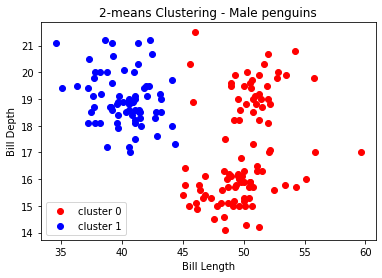

In [66]:
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans2.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==0],
            males_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==1],
            males_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('2-means Clustering - Male penguins')

plt.plot()
pass

Could this be improved by increasing the clusters? We know there are three types of species, so lets try 3 and throw in the unknowns to see where they sit:

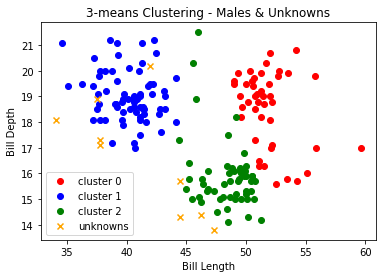

In [67]:
# Create an instance of the clusterer with k=3
kmeans3 = KMeans(n_clusters=3)
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==0],
            males_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==1],
            males_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==2],
            males_df[key2][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 2')

# Add the unknowns and see if they fit in
plt.scatter(unknowns_df[key1],unknowns_df[key2],
            color='orange', marker='x', label='unknowns')


plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('3-means Clustering - Males & Unknowns')

plt.plot()
pass

Some of the unknowns (x's) fit in, some less so, let's try the females:

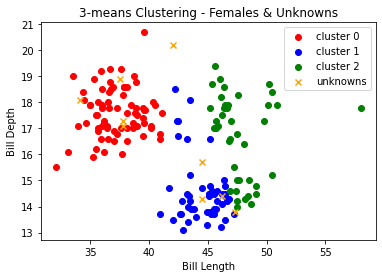

In [68]:
clusteringData_df = females_df[[key1, key2]]
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==0],
            females_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==1],
            females_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==2],
            females_df[key2][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 2')

# Add the unknowns and see if they fit in
plt.scatter(unknowns_df[key1],unknowns_df[key2],
            color='orange', marker='x', label='unknowns')


plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('3-means Clustering - Females & Unknowns')

plt.plot()
pass

In [69]:
# What values are in the assignedClusters
assignedClusters_clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int32)

In [70]:
# add results to females_df to see how they compare
females_df['cluster'] = assignedClusters_clust.labels_

In [71]:
females_df[females_df["Species"] == 'Adelie']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE,0
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE,0
...,...,...,...,...,...,...,...
68,Adelie,32.1,15.5,188.0,3050.0,FEMALE,0
69,Adelie,37.3,16.8,192.0,3000.0,FEMALE,0
70,Adelie,36.6,18.4,184.0,3475.0,FEMALE,0
71,Adelie,36.0,17.8,195.0,3450.0,FEMALE,0


In [72]:
females_df[females_df["Species"] == 'Gentoo']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
73,Gentoo,46.1,13.2,211.0,4500.0,FEMALE,1
74,Gentoo,48.7,14.1,210.0,4450.0,FEMALE,2
75,Gentoo,46.5,13.5,210.0,4550.0,FEMALE,1
76,Gentoo,45.4,14.6,211.0,4800.0,FEMALE,1
77,Gentoo,43.3,13.4,209.0,4400.0,FEMALE,1
78,Gentoo,40.9,13.7,214.0,4650.0,FEMALE,1
79,Gentoo,45.5,13.7,214.0,4650.0,FEMALE,1
80,Gentoo,45.8,14.6,210.0,4200.0,FEMALE,1
81,Gentoo,42.0,13.5,210.0,4150.0,FEMALE,1
82,Gentoo,46.2,14.5,209.0,4800.0,FEMALE,1


In [73]:
females_df[females_df["Species"] == 'Chinstrap']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
131,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE,2
132,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE,2
133,Chinstrap,45.2,17.8,198.0,3950.0,FEMALE,2
134,Chinstrap,46.1,18.2,178.0,3250.0,FEMALE,2
135,Chinstrap,46.0,18.9,195.0,4150.0,FEMALE,2
136,Chinstrap,46.6,17.8,193.0,3800.0,FEMALE,2
137,Chinstrap,47.0,17.3,185.0,3700.0,FEMALE,2
138,Chinstrap,45.9,17.1,190.0,3575.0,FEMALE,2
139,Chinstrap,58.0,17.8,181.0,3700.0,FEMALE,2
140,Chinstrap,46.4,18.6,190.0,3450.0,FEMALE,2


The Adelie and Chinstrap penguins are mostly in clusters 0 and 2 respectively, though the Chinstrap have some 0s and 1s. The Gentoos are more mixed (1 and 2).

## Classifying the penguin data

In [74]:
from sklearn.neighbors import KNeighborsClassifier

Classification is a data mining method that attempts to classify a new data point into a set of previously classified data. It is useful if we have some previously classified data to use for training the model, but we have new data that we do not know its classification.

For example, predicting if a new patient admitted to a hospital is likely to have a heart problem, based on their health record. 

Classification is about uncovering missing data and used where we want to make predictions about the data.

*When a prediction is required, the k-most similar records to a new record from the training dataset are located. From these neighbors, a summarized prediction is made.* (Brownlee, 2020)

For example, the hospital has other patient data to help classify new patients into at a risk or not at risk category of having a heart problem.

### k-Nearest Neighbours (kNN)

**What is kNN?**

The model for kNN is the entire training dataset. 

It is used when a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances (Brownlee, 2020) 
- kNN uses the local neighbourhood to obtain a prediction
- Distance function used to compare the similarity: e.g., Euclidean or Manhattan
- The prediction attribute of the most similar instances is summarised and returned as the prediction for the unseen instance.
- The similarity measure is dependent on the type of data. 
- For real-valued data, the Euclidean distance can be used. For other types of data, such as categorical or binary data, Hamming distance can be used.

The value of k can be adjusted (Cross-validation)
- Can over fit if k too low
    - E.g., extracted some variations in the data (noise)
- Can under fit if k too high
    - E.g., where the model does not capture the underlying structure of the data because something is missing


### Classification Examples

**Time/temporal based**

This is where we have data that is dependent on the time of the observation, but we do not have all the times.

For example, a bird watcher knows birds do things at particular times of the day or year, such as migrate, feed, etc. Classification would allow us to fill in observations for time slots we do not have the data for.

For this to work we need training data that has observations at various times. We can then generate observations for the missing times by classifying each time with an observation.

There can be uncertainties in this approach: the generated data may not reflect the population of the data.

**Observation based**

This is where we have data that is dependent on an observation, but the observation is incomplete. That is, we know something happened and have various supporting observations

For example, our bird watcher has observations of birds at a location, but we do not know which birds they are. Here, classification would allow us to fill in the birds for these observations.

For this to work we need training data that provides supporting observations. That is, we know from other observations what birds have been identified, so we can generate the detail for the missing observations.

There can be uncertainties in this approach: if the data is skewed and the training data has more of one type than another.

### Adelie Example

Adding the unknown data to the above clusters showed that some seemed to clearly belong to one cluster or another. We will investigate this further using kNN.

We'll just look at the Adelie penguin data, which we know has some records of unknown sex.

In [75]:
adelie_df = pd.read_csv('data/adelie.csv')
adelie_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


We'll split this into two dataframes, one with known sexes (training set) and one with the unknowns.

In [76]:
adelie_known_df = adelie_df[adelie_df['Sex']!='UNKNOWN'].copy()
adelie_known_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [77]:
adelie_unknown_df = adelie_df[adelie_df['Sex']=='UNKNOWN'].copy()
adelie_unknown_df

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
8,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
9,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN
10,Adelie,37.8,17.3,180.0,3700.0,UNKNOWN
46,Adelie,37.5,18.9,179.0,2975.0,UNKNOWN


### Applying a 3-nn classifier

Here we will look at just two features and see whether they can be used to determine the sex of a penguin.

In [78]:
classifier_3NN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
trainingData_df = adelie_known_df[['Bill Length', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_3NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [79]:
# Try with test values
testData_df = pd.DataFrame({'Bill Length':[40], 'Bill Depth':[17.5]})
testData_df

,Bill Length,Bill Depth
0,40,17.5


In [80]:
classifier_3NN.predict(testData_df)

array(['FEMALE'], dtype=object)

In [81]:
# Now try with the unknown values
testData_df = adelie_unknown_df[['Bill Length', 'Bill Depth']].copy()
testData_df

,Bill Length,Bill Depth
7,34.1,18.1
8,42.0,20.2
9,37.8,17.1
10,37.8,17.3
46,37.5,18.9


In [82]:
classifier_3NN.predict(testData_df)

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE'], dtype=object)

In [83]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_3NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,MALE


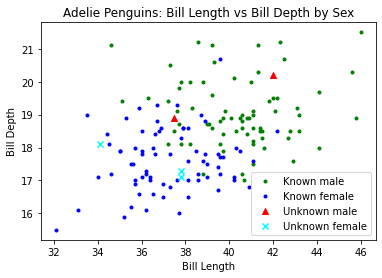

In [84]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Length'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Length'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Bill Length'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Bill Length'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Bill Length vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Most of these look reasonable. The more central male classification is less clear.

We can try a 5-nn classifier with different features

In [85]:
classifier_5NN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
trainingData_df = adelie_known_df[['Body Mass', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_5NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean')

In [86]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_5NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,FEMALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


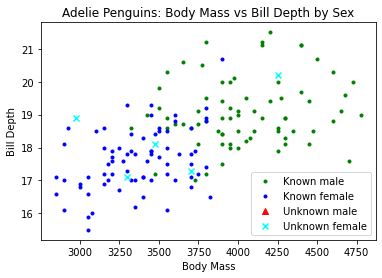

In [87]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Oh dear, we no longer have any unknown males.

### Normalisation

The two measurements in this case are very different. This can make a difference to classification. So we can normalise the data, i.e. scale it to make the range between 0 and 1.

In [88]:
trainingData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
trainingData_df['mass'] = (adelie_known_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
trainingData_df['depth'] = (adelie_known_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

trainingData_df.head()

,mass,depth
0,0.467532,0.533333
1,0.493506,0.316667
2,0.207792,0.416667
3,0.311688,0.633333
4,0.415584,0.850000


In [89]:
classifier_5NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean')

In [90]:
testData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
testData_df['mass'] = (adelie_unknown_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
testData_df['depth'] = (adelie_unknown_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

testData_df.head()

,mass,depth
7,0.324675,0.433333
8,0.727273,0.783333
9,0.233766,0.266667
10,0.441558,0.300000
46,0.064935,0.566667


In [91]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_5NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


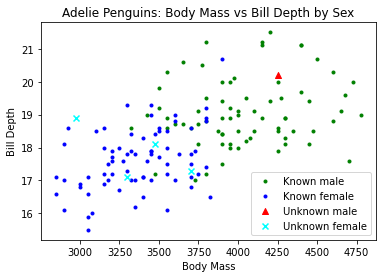

In [92]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

This looks a bit better.

###  Leave One Out (LOO) algorithm

The LOO algoithm is a way to measure the effectiveness of different values of k against known data. Exclude one item, build a classifier with the rest, then check the classification of the excluded item. Do that for all the items and for a range of k values.

In [93]:
def classify_single_case(trainingData_df, targetValues_ss, ix, k):
    '''Use k-NN to classify the member of trainingData_df with index
       ix using a k-nearest neighbours classifier. The classifier is
       trained on the data in trainingData_df and the classes in
       targetValues_ss, with the data point indexed by ix omitted.
       Returns the class assigned to the data point with index ix.
    '''

    # Create a classifier instance to do k-nearest neighbours
    myClassifier = KNeighborsClassifier(n_neighbors=k,
                                        metric='euclidean',
                                        weights='uniform')

    # Now apply the classifier to all data points except
    # the one indexed by ix
    myClassifier.fit(trainingData_df.drop(ix, axis='index'),
                     targetValues_ss.drop(ix))

    # Return the class predicted by the trained classifier. Need
    # to predict on list of trainingData_df.loc[ix], as predict
    # expects a list/array, rather than a single value

    return myClassifier.predict([trainingData_df.loc[ix]])[0]

In [94]:
trainingData_df = adelie_known_df[['Bill Length', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']

# Return the predicted value of the data point with index 3 for k=3
# the known value is FEMALE
classify_single_case(trainingData_df, targetValues_ss, 3, 3)

'MALE'

In [95]:
# check what is at index 3
targetValues_ss[3]

'FEMALE'

In [96]:
# And now for k=5
classify_single_case(trainingData_df, targetValues_ss, 3, 5)

'FEMALE'

Now we run it for a range of k values.

In [97]:
for k in range(3, 30, 2):
    count = 0
    for i in trainingData_df.index:
        result = classify_single_case(trainingData_df, targetValues_ss, i, k)
        if targetValues_ss.loc[i] == result:
            count += 1
    print(k, '\t', count)

3 	 119
5 	 119
7 	 121
9 	 120
11 	 121
13 	 123
15 	 124
17 	 123
19 	 122
21 	 123
23 	 122
25 	 123
27 	 124
29 	 124


Here we might choose k=15, since it is the smallest value of k with the most hits (124).

In [98]:
# And now for k=15
classifier_15NN = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
trainingData_df = adelie_known_df[['Body Mass', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_15NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [99]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_15NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,FEMALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


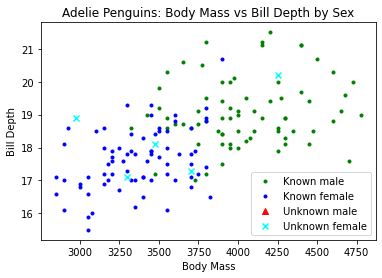

In [100]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Back to losing the unknown male. Perhaps more investigation is needed to look at more than the body mass and bill depth.

### Using all four measurements, with normalised data

Since we have seen there are differences in the values, we shall normalise the training data and the test data.

In [101]:
full_trainingData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
full_trainingData_df['mass'] = (adelie_known_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
full_trainingData_df['depth'] = (adelie_known_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

divisor = adelie_df['Bill Length'].max() - adelie_df['Bill Length'].min()
full_trainingData_df['length'] = (adelie_known_df['Bill Length'] - adelie_df['Bill Length'].min())/divisor

divisor = adelie_df['Flipper Length'].max() - adelie_df['Flipper Length'].min()
full_trainingData_df['flipper'] = (adelie_known_df['Flipper Length'] - adelie_df['Flipper Length'].min())/divisor

full_trainingData_df.head()

,mass,depth,length,flipper
0,0.467532,0.533333,0.503597,0.236842
1,0.493506,0.316667,0.532374,0.368421
2,0.207792,0.416667,0.589928,0.605263
3,0.311688,0.633333,0.330935,0.552632
4,0.415584,0.850000,0.517986,0.473684


In [102]:
full_testData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
full_testData_df['mass'] = (adelie_unknown_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
full_testData_df['depth'] = (adelie_unknown_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

divisor = adelie_df['Bill Length'].max() - adelie_df['Bill Length'].min()
full_testData_df['length'] = (adelie_unknown_df['Bill Length'] - adelie_df['Bill Length'].min())/divisor

divisor = adelie_df['Flipper Length'].max() - adelie_df['Flipper Length'].min()
full_testData_df['flipper'] = (adelie_unknown_df['Flipper Length'] - adelie_df['Flipper Length'].min())/divisor

full_testData_df

,mass,depth,length,flipper
7,0.324675,0.433333,0.143885,0.552632
8,0.727273,0.783333,0.712230,0.473684
9,0.233766,0.266667,0.410072,0.368421
10,0.441558,0.300000,0.410072,0.210526
46,0.064935,0.566667,0.388489,0.184211


Use LOO to work out a good value for k:

In [103]:
targetValues_ss = adelie_known_df['Sex']
for k in range(3, 30, 2):
    count = 0
    for i in full_trainingData_df.index:
        result = classify_single_case(full_trainingData_df, targetValues_ss, i, k)
        if targetValues_ss.loc[i] == result:
            count += 1
    print(k, '\t', count)

3 	 133
5 	 130
7 	 134
9 	 130
11 	 134
13 	 134
15 	 129
17 	 130
19 	 133
21 	 133
23 	 132
25 	 133
27 	 131
29 	 131


In [ ]:
This time 7 is lowest with the highest hit.

Create and use the classifier:

In [104]:
classifier_7NN = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier_7NN.fit(full_trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [105]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_7NN.predict(full_testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


Try a couple of plots to see how reasonable the result is.

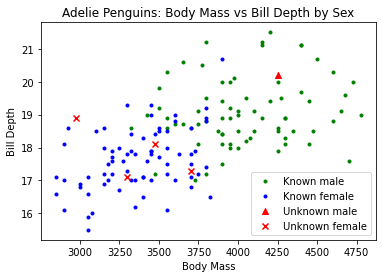

In [106]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='red', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

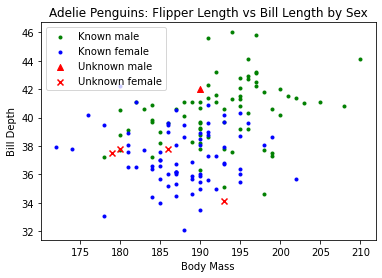

In [108]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Flipper Length'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Length'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Flipper Length'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Length'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Flipper Length'],
    results_df[results_df['Sex']=='MALE']['Bill Length'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Flipper Length'],
    results_df[results_df['Sex']=='FEMALE']['Bill Length'],
    color='red', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Flipper Length vs Bill Length by Sex')
plt.legend()
plt.plot()
pass

We are back to one unknown male and the rest female, but we have now thoroughly checked all the data available to us.

**Further work:**
- investigate the unknowns in the other types of penguins

### References and licenses

Brownlee, J. (2020). Develop k-Nearest Neighbors in Python From Scratch - Machine Learning Mastery. [online] Machine Learning Mastery. Available at: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ [Accessed 6th April 2021].

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

Horst, A. (2022). palmerpenguins. https://github.com/allisonhorst/palmerpenguins/blob/main/README.md (Accessed 2023-04-17).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2021-03-26).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2021-03-26).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarctica) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2021-03-26).

Pandey, P. (2020). Palmer Archipelago (Antarctica) penguin data. https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data (Accessed 2023-04-17).
